<a href="https://colab.research.google.com/github/paolala24/proyecto_final/blob/main/Modulacion_QAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq


In [ ]:
# Diccionario de mapeo 16-QAM (Gray coding)
qam16_map = {
    '0000': (-3, -3), '0001': (-3, -1), '0011': (-3,  1), '0010': (-3,  3),
    '0100': (-1, -3), '0101': (-1, -1), '0111': (-1,  1), '0110': (-1,  3),
    '1100': ( 1, -3), '1101': ( 1, -1), '1111': ( 1,  1), '1110': ( 1,  3),
    '1000': ( 3, -3), '1001': ( 3, -1), '1011': ( 3,  1), '1010': ( 3,  3),
}


In [ ]:
# Generar bits aleatorios
num_symbols = 100  # cantidad de símbolos
bits = np.random.randint(0, 2, size=(num_symbols * 4))  # 4 bits por símbolo

# Convertir a cadenas de 4 bits
symbols_bin = [''.join(map(str, bits[i:i+4])) for i in range(0, len(bits), 4)]

# Mapear a coordenadas I/Q
I_symbols = []
Q_symbols = []

for sym in symbols_bin:
    I, Q = qam16_map[sym]
    I_symbols.append(I)
    Q_symbols.append(Q)

I_symbols = np.array(I_symbols)
Q_symbols = np.array(Q_symbols)


In [ ]:
# Parámetros de tiempo
fs = 10000  # Hz
symbol_rate = 1000  # símbolos por segundo
samples_per_symbol = fs // symbol_rate
t = np.arange(0, num_symbols / symbol_rate, 1/fs)

# Expandir I y Q por símbolo
I_t = np.repeat(I_symbols, samples_per_symbol)
Q_t = np.repeat(Q_symbols, samples_per_symbol)


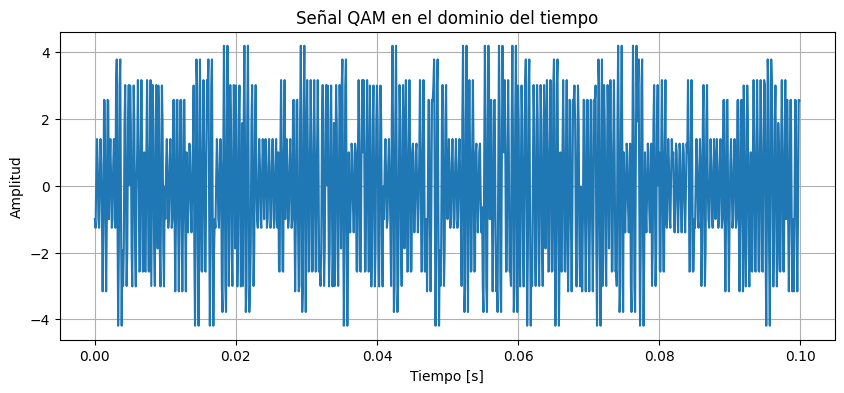

In [ ]:
# Frecuencia de portadora
fc = 2000  # Hz

# Portadoras ortogonales
cos_wave = np.cos(2 * np.pi * fc * t)
sin_wave = np.sin(2 * np.pi * fc * t)

# Señal QAM(t)
qam_signal = I_t * cos_wave - Q_t * sin_wave

# Graficar señal QAM en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], qam_signal[:1000])  # solo una pequeña parte para ver mejor
plt.title('Señal QAM en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


La señal resultante es una combinación de I(t) y Q(t) moduladas sobre coseno y seno, respectivamente. Esto produce la señal 16-QAM, que varía en amplitud y fase.

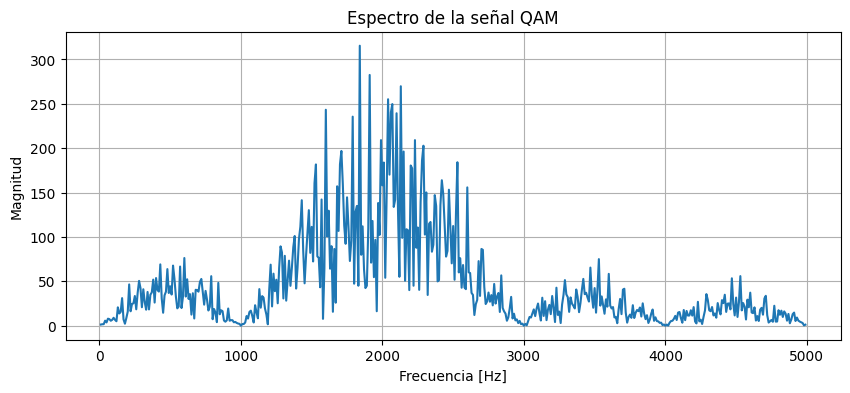

In [ ]:
# Calcular FFT
qam_fft = np.abs(fft(qam_signal))
freqs = fftfreq(len(qam_signal), 1/fs)

# Mostrar mitad positiva del espectro
half = freqs > 0

plt.figure(figsize=(10, 4))
plt.plot(freqs[half], qam_fft[half])
plt.title('Espectro de la señal QAM')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


El espectro muestra una concentración de energía alrededor de la frecuencia de portadora (2000 Hz), lo cual es característico de señales moduladas.

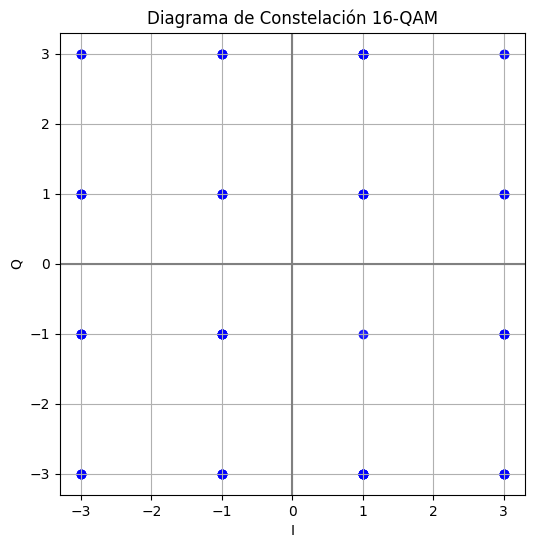

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(I_symbols, Q_symbols, c='blue', alpha=0.6)
plt.title('Diagrama de Constelación 16-QAM')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show()


Este diagrama muestra los 16 posibles puntos de la constelación 16-QAM, cada uno representando una combinación única de 4 bits. Las posiciones en I y Q indican las amplitudes relativas para cada portadora.

# Discusión

En este ejercicio implementamos un sistema básico de modulación 16-QAM. Generamos datos binarios aleatorios, los mapeamos a coordenadas en el plano I/Q usando Gray code, y construimos las señales I(t) y Q(t). Luego, las modulamos sobre una portadora senoidal ortogonal para obtener la señal QAM(t). Analizamos su comportamiento en el dominio del tiempo y observamos el espectro en frecuencia centrado en la portadora. Finalmente, graficamos la constelación, observando cómo los puntos se agrupan de forma ordenada en 16 posiciones distintas. Esta modulación es muy eficiente y ampliamente usada en telecomunicaciones por su capacidad de transmitir varios bits por símbolo.